# Programming for Data Analysis Project 2018

## Richella O'Driscoll

## H.Dip in Data Analytics

## Problem Statement

For this assignment I must create a data set by simulating a real world phenomenon of my choice. I must then model and synthesise this data using Python. There are four distinct tasks which must be carried out:

* Choose a real world phenomenon that can be measured and for which I can collect at least one hundred data points across at least four differenct variables.
* Investigate the types of variables involved, their likely distributions and their relationships with each other.
* Simulate a data set as closely matching their properties as possible.
* Detail my research and implement this simulation in a Jupyter notebook.


# Real World Phenomenon

The real world phenomenon that I am going to pick for this project is the crimes that have been recorded in over 500 garda stations in the Republic of Ireland throughout 2015. https://data.gov.ie/dataset/crimes-at-garda-stations-level-2010-2016.[1]
I have picked this topic as I have studied law at an undergraduate level and have a great interest in the different levels of crime that are recorded in different areas of the country, a lot of these crimes depending on whether the garda station is in a rural or urban location.


## My Analysis

In order for me to compete this assignment, there were a number of resources I needed. These included:
* Jupyter Notebook
* Github
* Python version 3.6 downloaded through Anaconda3
After some research I realised that I would also need to ensure that there was a number of other libraries installed on Python so that I would be able to complete this assignment. These included matplotlib, numpy and pandas. From that I then had to ensure that other modules and functions were installed which would help me to extract the results from the Crimes at Garda Station Level Data set and also give me the ability to create different types of charts to display the data.

In [161]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  
from scipy import stats


Next I will import the data set which I downloaded from datagov.ie and saved as a CSV on my desktop. I also want to see how many rows and columns are in this specific set of data:

In [160]:
import pandas as pd
from pandas import DataFrame

(df) = pd.read_csv (r'C:\Users\riche\Desktop\garda_stations.csv')
df.shape


(563, 7)

I now want to dislay the entire data set:

In [82]:
display (df)

,Station,Divisions,Total Crimes,Attempts or threats to murder,Burglaries,Drug Offences,Public order offences
0,Abbeyfeale,Limerick Division,90,19,27,10,34
1,Abbeyleix,Laois/Offaly Division,91,13,53,9,16
2,Adare,Limerick Division,30,4,19,1,6
3,Aglish,Waterford Division,12,3,4,4,1
4,Ahascragh,Galway Division,16,10,2,1,3
5,Ailt an Chorrain,Donegal Division,10,4,3,1,2
6,An Bun Beag,Donegal Division,30,11,9,1,9
7,An Charraig,Donegal Division,2,2,0,0,0
8,An Cheathru Rua,Galway Division,25,11,2,0,12
9,An Clochan Liath,Donegal Division,43,20,4,0,19


I want to get an idea of the main measurements of the data - to do this I will use the describe function which shows me the mean, standard deviation, min etc

In [133]:
df.describe() #Display the mean, the min and max values for each offence listed


,Total Crimes,Attempts or threats to murder,Burglaries,Drug Offences,Public order offences
count,563.000000,563.000000,563.000000,563.000000,563.000000
mean,162.737123,30.138544,46.630551,26.854352,59.113677
std,380.861939,57.451994,95.916029,69.934642,203.478420
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,5.000000,1.000000,3.000000
50%,35.000000,10.000000,12.000000,4.000000,9.000000
75%,120.500000,28.000000,33.000000,16.500000,36.000000
max,4895.000000,635.000000,828.000000,926.000000,3265.000000


I need to clean the data and ensure that there are no null values in the data set:

In [134]:
df.isnull().sum()

Station                          0
Divisions                        0
Total Crimes                     0
Attempts or threats to murder    0
Burglaries                       0
Drug Offences                    0
Public order offences            0
dtype: int64

Next I want to see if there are any duplications in the data set:

In [135]:
df[df.duplicated()]

,Station,Divisions,Total Crimes,Attempts or threats to murder,Burglaries,Drug Offences,Public order offences


I now want to see how what columns in the set are numbers:

In [136]:
df.dtypes

Station                          object
Divisions                        object
Total Crimes                      int64
Attempts or threats to murder     int64
Burglaries                        int64
Drug Offences                     int64
Public order offences             int64
dtype: object

I will now draw up a quick graph to see how many attempted murders there were in 2015 and how many stations reported this variable:

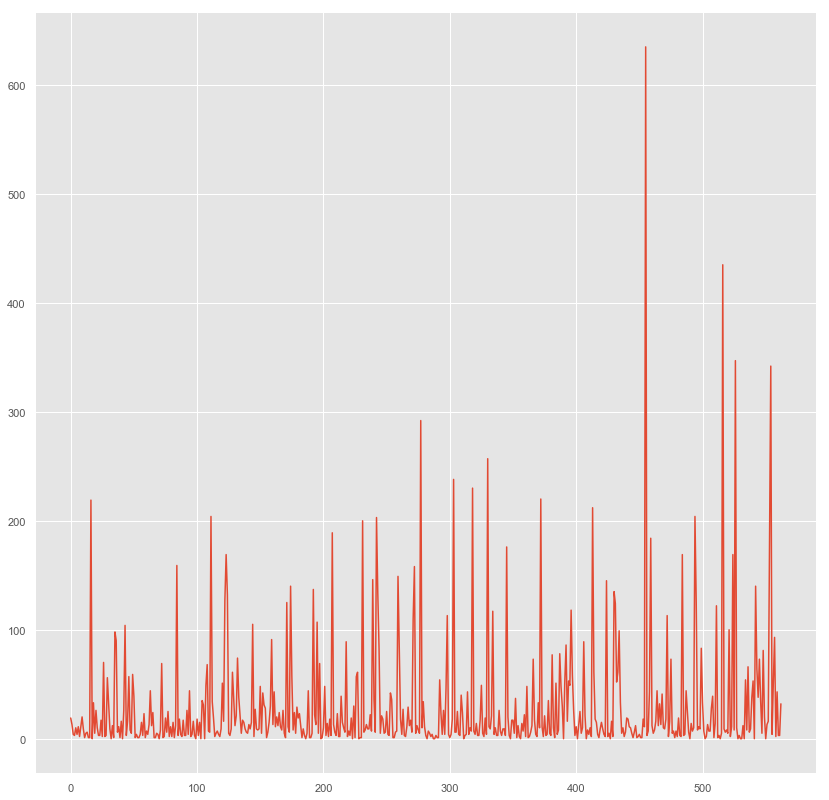

In [110]:
testdata= pd.read_csv(r'C:\Users\riche\Desktop\garda_stations.csv')
testdata['Attempts or threats to murder'].plot()
plt.show()


I will now draw up a quick graph to see how many burglaries there were in 2015 and how many stations reported this variable:

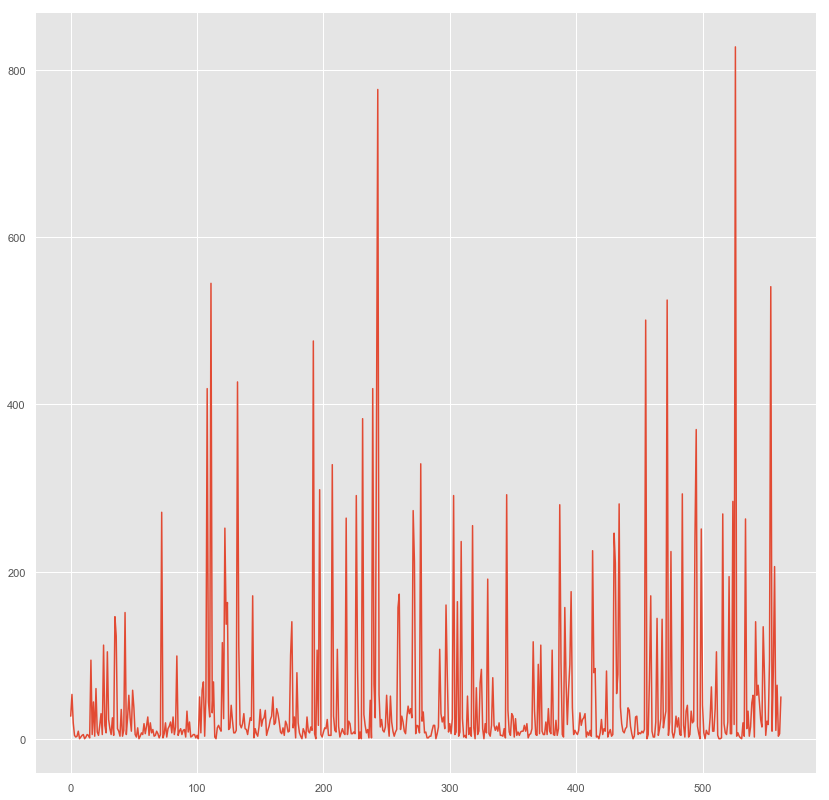

In [108]:
testdata= pd.read_csv(r'C:\Users\riche\Desktop\garda_stations.csv')
testdata['Burglaries'].plot()
plt.show()


I will now draw up a quick graph to see how many Drug Offences there were in 2015 and how many stations reported this variable:

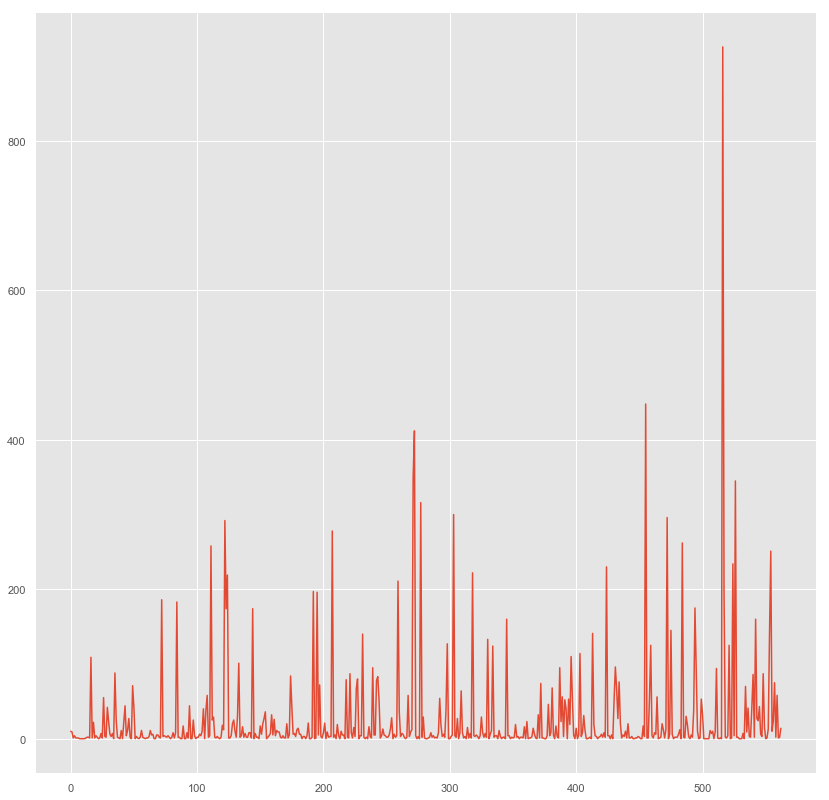

In [109]:
testdata= pd.read_csv(r'C:\Users\riche\Desktop\garda_stations.csv')
testdata['Drug Offences'].plot()
plt.show()

In the below graph I decided to use a scatter plot to display the data of the two most interesting and popular crimes from the 563 Garda Stations, Burglaries and Attempts or Threats to Murder. I divided the data into the divisions and decided as there are less divisions, it would display the plot better.

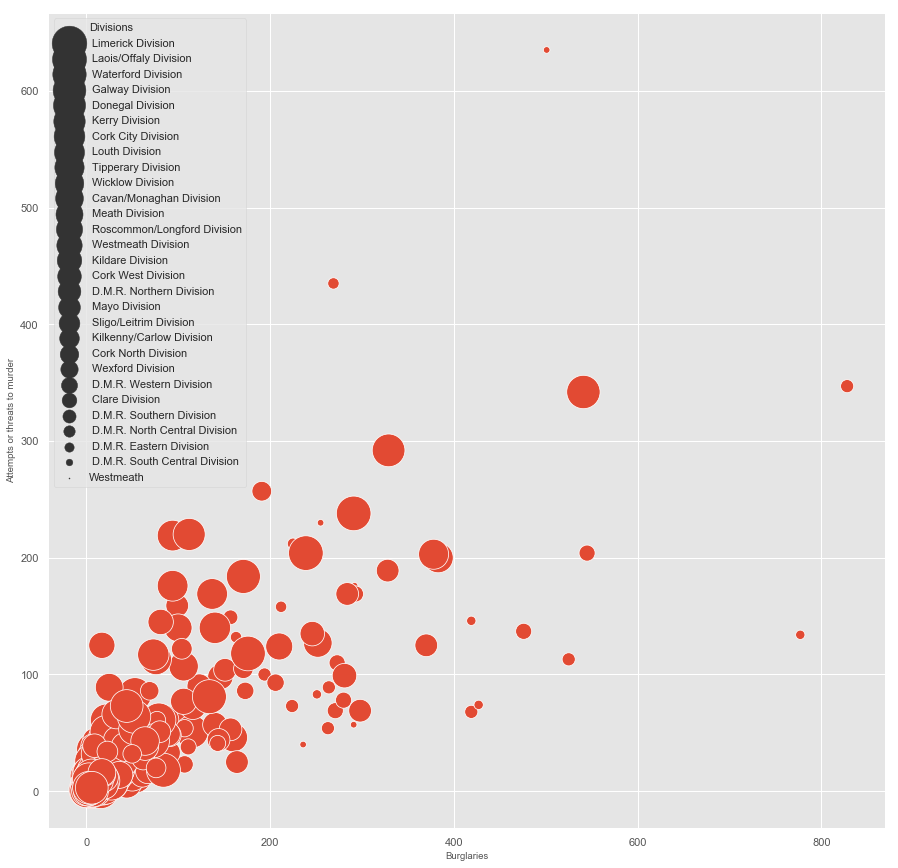

In [185]:

cmap = sns.cubehelix_palette(rot=-.05, as_cmap=True)
ax = sns.scatterplot(x="Burglaries", y="Attempts or threats to murder", size="Divisions",
                     palette=cmap, sizes=(1, 1200),
                     data=testdata)

On the below whitegrid graph, I am going to display all four crimes, how many stations the crimes were recorded in and in how many instances they took place with the stations on the X axis and the instances on the Y axis.

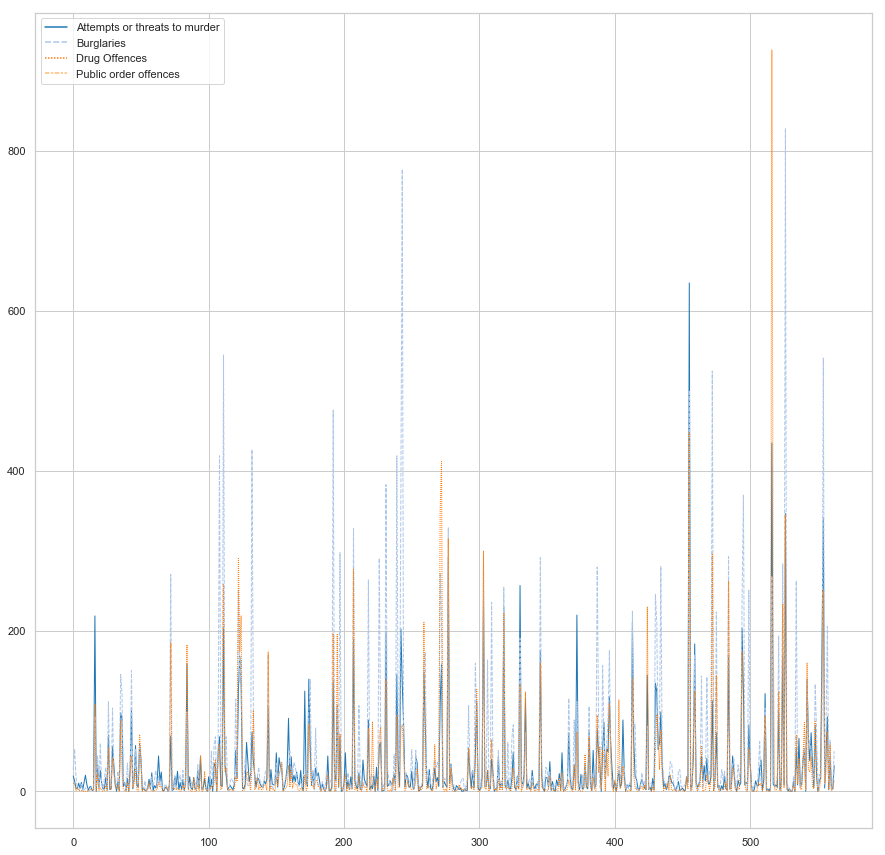

In [177]:
sns.set(style="whitegrid")



data = pd.DataFrame(testdata, columns=['Attempts or threats to murder' ,'Burglaries', 'Drug Offences', 'Public order offences'])


sns.lineplot(data=data, palette="tab20", linewidth=1)

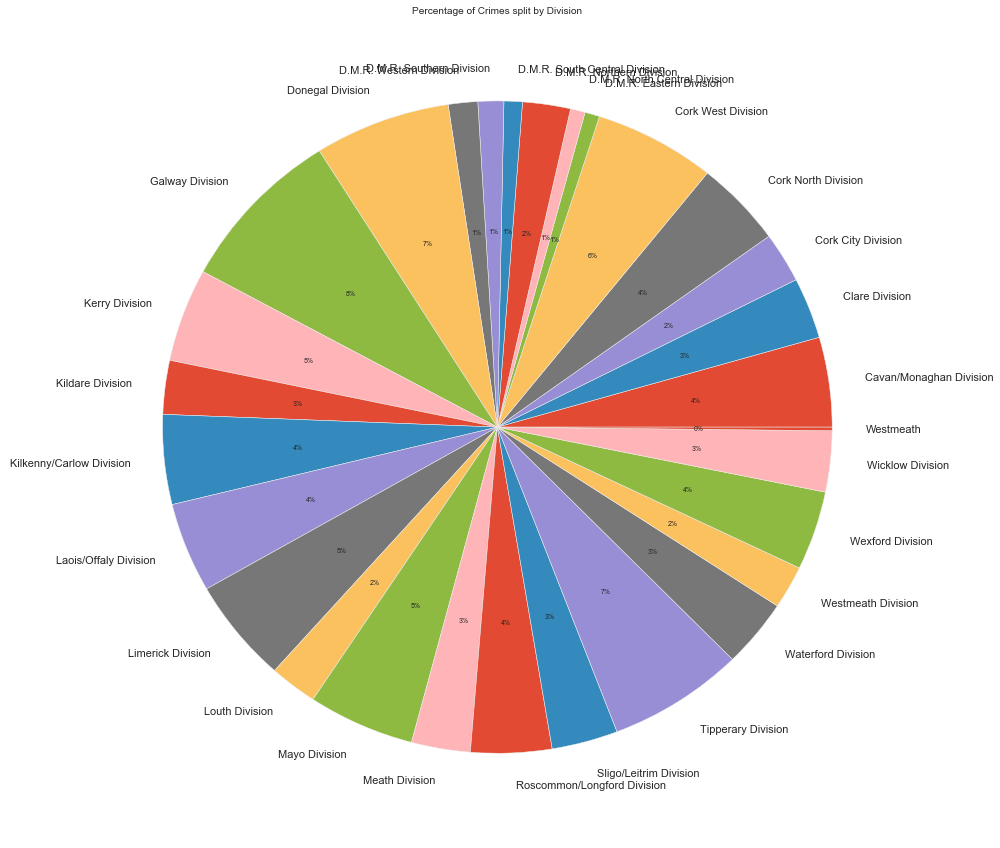

In [186]:

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 7})
plt.rcParams['figure.figsize'] = [15, 15]

count = df.groupby('Divisions').count()['Burglaries']
# plot my pie chart
plt.pie(count,labels=count.index, autopct='%1.0f%%')
plt.title("Percentage of Crimes split by Division")

plt.show()

In the below graphs I have decided to display histograms which are similar to the whitegraph however I have broken these out into the specific crimes which were committed.

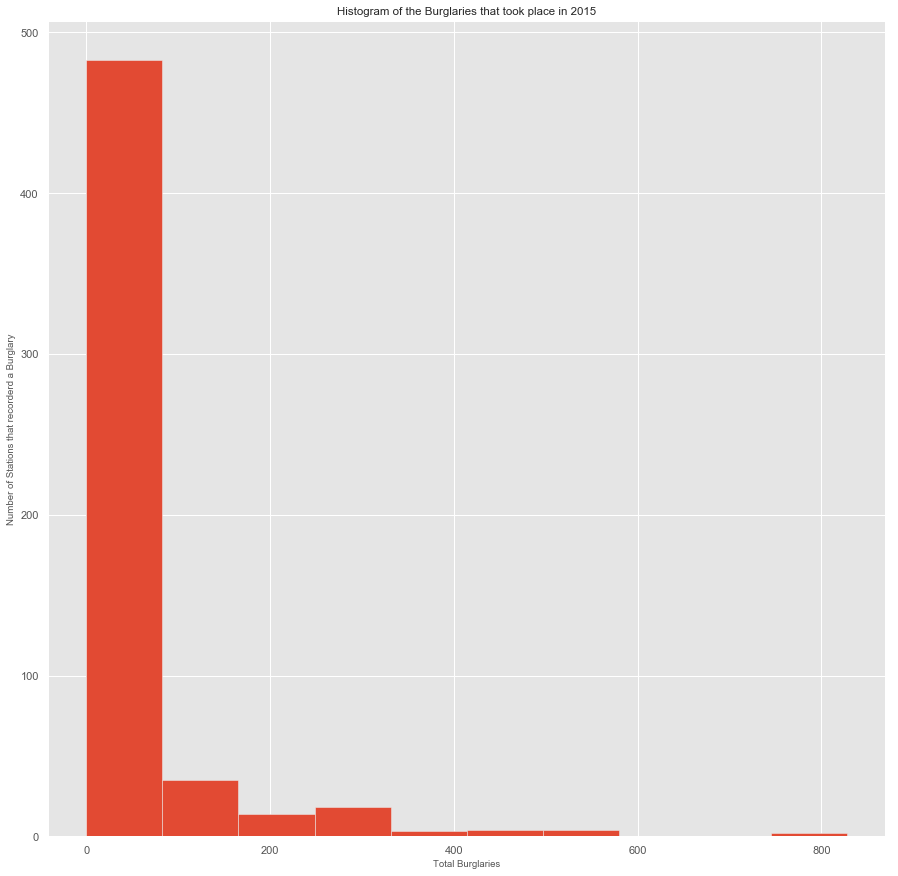

In [153]:

df.hist('Burglaries')  #plot my histogram showing amount of Burglaries

plt.title('Histogram of the Burglaries that took place in 2015') #title of my histogram

plt.xlabel('Total Burglaries')  #x axis label

plt.ylabel('Number of Stations that recorderd a Burglary')  #y axis label

plt.show()  #show my histogram

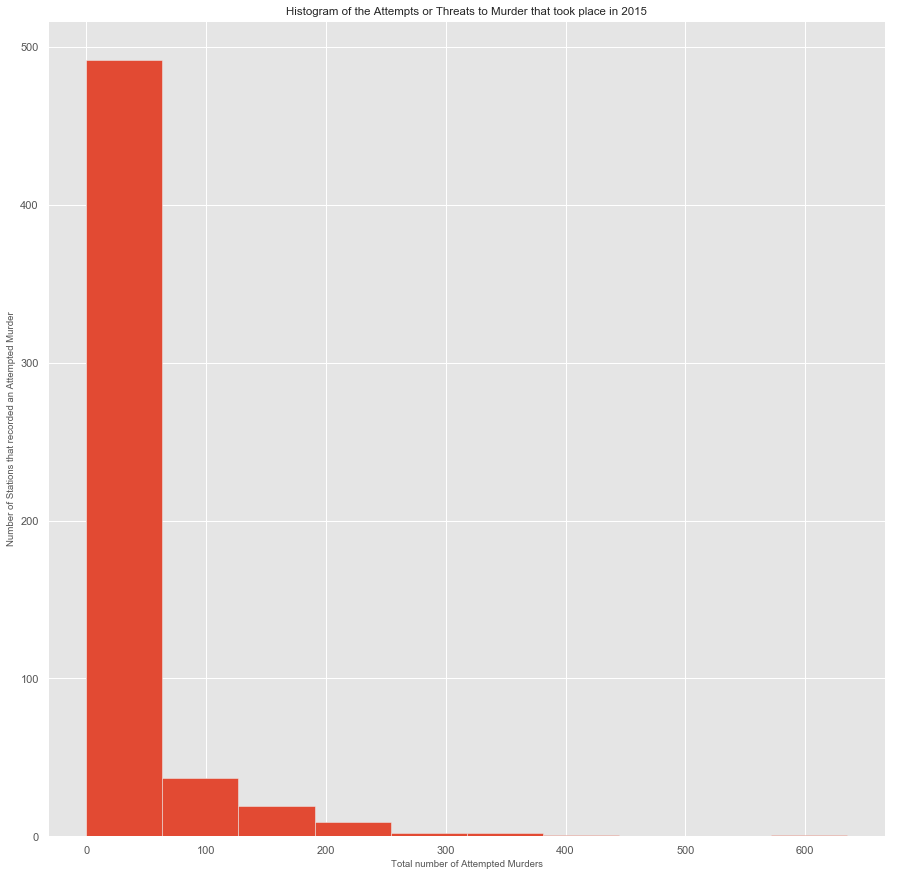

In [154]:
df.hist('Attempts or threats to murder')  #plot my histogram showing the number of attempted murders

plt.title('Histogram of the Attempts or Threats to Murder that took place in 2015') #title of my histogram

plt.xlabel('Total number of Attempted Murders')  #x axis label

plt.ylabel('Number of Stations that recorded an Attempted Murder')  #y axis label

plt.show()  #show my histogram

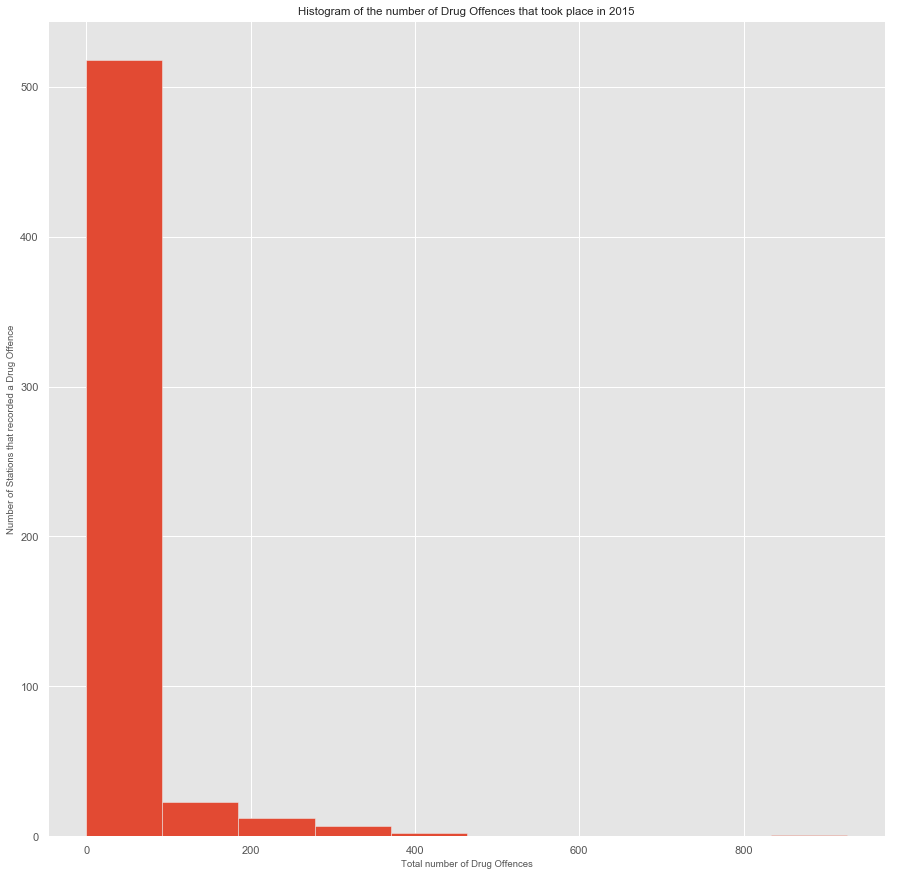

In [155]:
df.hist('Drug Offences')  #plot my histogram showing the number of Drug Offences

plt.title('Histogram of the number of Drug Offences that took place in 2015') #title of my histogram

plt.xlabel('Total number of Drug Offences')  #x axis label

plt.ylabel('Number of Stations that recorded a Drug Offence')  #y axis label

plt.show()  #show my histogram

Next I want to see the number of garda stations that have recorded Burglaries and how many to be exact.

In [169]:
print(df.groupby('Burglaries').size())

Burglaries
0      20
1      17
2      21
3      27
4      29
5      37
6      24
7      24
8      21
9      24
10     14
11      9
12     19
13     10
14     10
15     10
16     13
17      6
18      8
19      9
20     10
21      5
22      3
23      8
24      6
25     10
26      8
27      7
29      1
30      7
       ..
246     1
251     1
252     1
255     1
263     1
264     1
269     1
271     1
273     1
280     1
281     1
284     1
291     2
292     1
293     1
298     1
328     1
329     1
370     1
378     1
383     1
419     2
427     1
476     1
501     1
525     1
541     1
545     1
777     1
828     1
Length: 133, dtype: int64


Next I want to see the number of garda stations that have recorded Drug Offences and how many to be exact.

In [170]:
print(df.groupby('Drug Offences').size())

Drug Offences
0      96
1      69
2      73
3      38
4      37
5      21
6      18
7      11
8      16
9       7
10      8
11      9
12      6
13      3
14      4
15      3
16      3
17      4
18      2
19      5
20      6
21      2
22      1
23      4
24      2
25      4
26      1
27      5
28      1
29      3
       ..
133     1
140     1
141     2
145     1
160     2
174     2
175     1
183     1
186     1
196     1
197     1
198     1
211     1
219     1
222     1
230     1
234     1
251     1
258     1
262     1
278     1
292     1
296     1
300     1
316     1
345     1
350     1
412     1
448     1
926     1
Length: 107, dtype: int64


Next I want to see the number of garda stations that have recorded Attempts or Threats to Murder and how many to be exact.

In [175]:
print(df.groupby('Attempts or threats to murder').size())

Attempts or threats to murder
0      30
1      38
2      35
3      40
4      32
5      31
6      22
7      18
8      14
9      20
10     16
11     16
12     14
13     11
14      5
15      9
16      9
17      8
18     10
19      8
20      4
21      6
22      3
23      4
24      4
25      5
26      7
27      2
28      2
29      2
       ..
125     2
127     1
132     1
134     1
135     1
137     1
140     2
145     1
146     1
149     1
158     1
159     1
169     3
176     2
184     1
189     1
200     1
203     1
204     2
212     1
219     1
220     1
230     1
238     1
257     1
292     1
342     1
347     1
435     1
635     1
Length: 115, dtype: int64


## Conclusion:

From the above data I have graphed readily avaiable stats which can be used by An Garda Sciochana to deploy resource and man power to the divisions that have a higher level of crime such as all the DMR Regions (Dublin) and from what I have displayed in the scatter plot - the divisions outside Dublin which have recorded a high level of crime - Limerick, Laois/Offaly, Waterford, Galway, Donegal, Kerry, Cork City, Louth and Tipperary.

## References:

[1] https://data.gov.ie/dataset/crimes-at-garda-stations-level-2010-2016.

[2] https://matplotlib.org/users/style_sheets.html
